In [1]:
ls po_logs/

po_baseline1/
po_baseline1_1000_std10.pickle
po_baseline1_100_std10.pickle
po_baseline1_1100_std10.pickle
po_baseline1_1200_std10.pickle
po_baseline1_1249_std10.pickle
po_baseline1_200_std10.pickle
po_baseline1_300_std10.pickle
po_baseline1_400_std10.pickle
po_baseline1_500_std10.pickle
po_baseline1_600_std10.pickle
po_baseline1_700_std10.pickle
po_baseline1_800_std10.pickle
po_baseline1_900_std10.pickle
po_baseline2/
po_baseline2_1000_std10.pickle
po_baseline2_100_std10.pickle
po_baseline2_1100_std10.pickle
po_baseline2_1200_std10.pickle
po_baseline2_1249_std10.pickle
po_baseline2_200_std10.pickle
po_baseline2_300_std10.pickle
po_baseline2_400_std10.pickle
po_baseline2_500_std10.pickle
po_baseline2_600_std10.pickle
po_baseline2_700_std10.pickle
po_baseline2_800_std10.pickle
po_baseline2_900_std10.pickle
po_baseline3/
po_baseline3_1000_std10.pickle
po_baseline3_100_std10.pickle
po_baseline3_1100_std10.pickle
po_baseline3_1200_std10.pickle
po_baseline3_1249_std10.pickle
po_baseline3_200

In [105]:
import glob
all_names = glob.glob('po_logs/po_gate1_*_*')
import pickle
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [106]:
all_names

['po_logs/po_gate1_100_std10_delta0.05.pickle',
 'po_logs/po_gate1_200_std10_delta0.05.pickle',
 'po_logs/po_gate1_300_std10_delta0.05.pickle',
 'po_logs/po_gate1_400_std10_delta0.05.pickle',
 'po_logs/po_gate1_500_std10_delta0.05.pickle',
 'po_logs/po_gate1_600_std10_delta0.05.pickle',
 'po_logs/po_gate1_700_std10_delta0.05.pickle',
 'po_logs/po_gate1_800_std10_delta0.05.pickle',
 'po_logs/po_gate1_900_std10_delta0.05.pickle',
 'po_logs/po_gate1_1000_std10_delta0.05.pickle',
 'po_logs/po_gate1_1100_std10_delta0.05.pickle',
 'po_logs/po_gate1_1200_std10_delta0.05.pickle',
 'po_logs/po_gate1_1249_std10_delta0.05.pickle']

In [107]:
# import visualize functions
import math
def draw_int_rew(data,i,gate=False,filt=False,write=False):
    plt.figure(figsize=(9.3, 5),facecolor="gray")
    x = [math.sin(rad*np.pi) for rad in data['target'][i]]
    y = [-math.cos(rad*np.pi) for rad in data['target'][i]]
    losses = [d[0] for d in data['target_losses'][i]]
    # print(losses)
        
    plt.rcParams["axes.facecolor"] = (1,1,1,0)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1,1.1)
    plt.scatter(x,y,s=5,cmap='magma',c=losses)
    plt.colorbar()
    if gate:
        x = [math.sin(rad*np.pi)*0.8 for rad in data['target'][i]]
        y = [-math.cos(rad*np.pi)*0.8 for rad in data['target'][i]]
        losses = [d[0] for d in data['target_a_losses'][i]]
        plt.scatter(x,y,s=5,cmap='magma',c=losses)
        plt.colorbar()
    if filt:
        x = [math.sin(rad*np.pi)*0.6 for rad in data['target'][i]]
        y = [-math.cos(rad*np.pi)*0.6 for rad in data['target'][i]]
        losses = [d[0] for d in data['gated_losses'][i]]
        plt.scatter(x,y,s=5,cmap='magma',c=losses)
        # print('uchigawa-gatego',losses)
        plt.colorbar()
    if write:
        plt.title(str(i))
        plt.savefig('animes/fig'+str(i)+'.png',format = 'png', dpi=100)

In [108]:
mkdir animes

mkdir: cannot create directory ‘animes’: File exists


In [109]:
data = {"qt+i_r":[],
       'reward':[],
       "loss":[],
       "loss_a":[]}
for j,an in enumerate(all_names):
    print(j,len(all_names))
    with open(an,mode='rb') as f:
        tmp = pickle.load(f)
        data["qt+i_r"] += [d for i, d in enumerate(tmp["qt+i_r"]) if i%100==0]
        data['reward'] += [d for i, d in enumerate(tmp['reward'])]
        data["loss"] += [d for i, d in enumerate(tmp["loss"]) if i%100==0]
        data["loss_a"] += [d for i, d in enumerate(tmp["loss_a"]) if i%100==0]

0 13
1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13
10 13
11 13
12 13


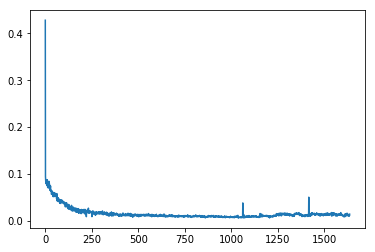

In [110]:
plt.plot(list(range(len(data["qt+i_r"]))), [float(sum(d.array)/len(d.array)) for d in data["qt+i_r"]])

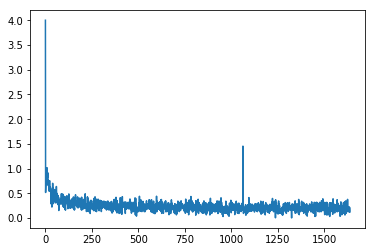

In [111]:
plt.plot(list(range(len(data["loss"]))), [float(d.array) for d in data["loss"]])

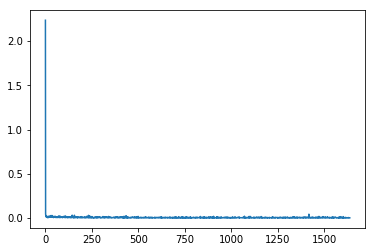

In [112]:
plt.plot(list(range(len(data["loss_a"]))), [float(d.array) for d in data["loss_a"]])

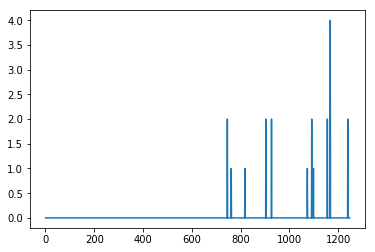

In [113]:
plt.plot(list(range(len(data['reward']))), data['reward'])

In [114]:
rews = list((data['reward']))
mean_rews10 = [sum(rews[i:i+10])/10 for i in range(len(rews)-10)]

In [115]:
len(mean_rews10)

1239

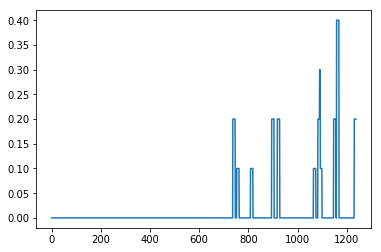

In [116]:
plt.plot(range(len(mean_rews10)), mean_rews10)

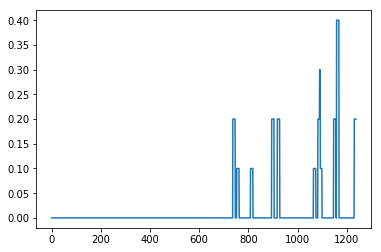

In [117]:
plt.plot(range(len(mean_rews10)), mean_rews10)

In [118]:
len(all_names)

13

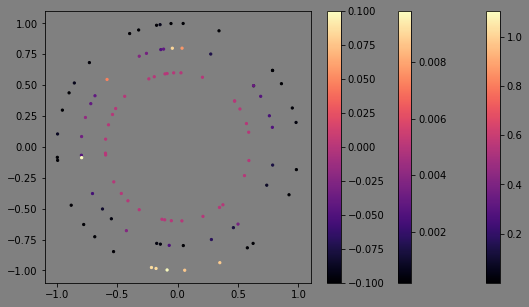

In [119]:
num = 12
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,len(data['target_losses'])-1,gate=True,filt=True)

In [9]:
for i in range(data['gated_losses'][10000])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
1+1

In [ ]:
num=0
import tqdm
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
for i in tqdm.tqdm(range(len(data['target_losses']))):
    if sum(data['gated_losses'][i]) !=0.0:
        draw_int_rew(data,i,gate=True,filt=True,write=True)

/home/lab/shigeharu/.virtualenvs/py3/lib/python3.5/site-packages/chainer/training/extensions/plot_report.py:16: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lab/shigeharu/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/lab/shigeharu/.virtualenvs/py3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lab/shigeharu/.virtualenvs/py3/lib/python3.5/site-packages/ipy

In [10]:
rm animes/*

In [ ]:
num = 100
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,100,gate=True,filt=True)

In [ ]:
num = 100
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,60,gate=True,filt=True)

In [ ]:
num = 3
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,len(data['target_losses'])-10,gate=True,filter=True)

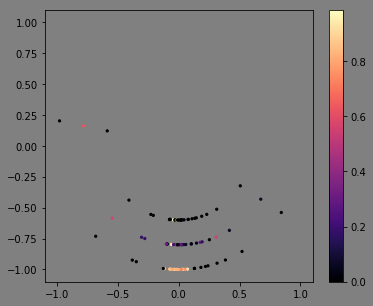

In [51]:
num = 3
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,len(data['target_losses'])-100,gate=True,filt=True)

In [ ]:
num = 1
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,len(data['target_losses'])-9000,gate=True,filt=True)

In [11]:
num = 17
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,100,gate=True)

IndexError: list index out of range

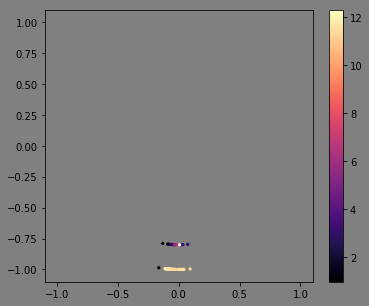

In [122]:
num = 17
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,200,gate=True)

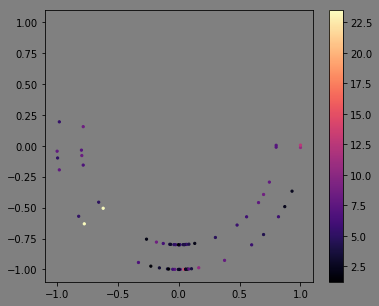

In [118]:
num = 0
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,0,gate=True)

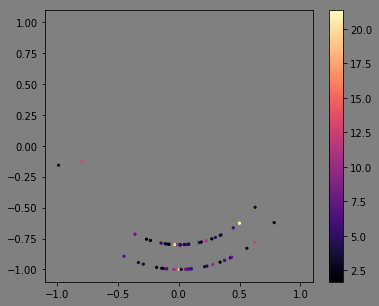

In [106]:
num = 0
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,2,gate=True)

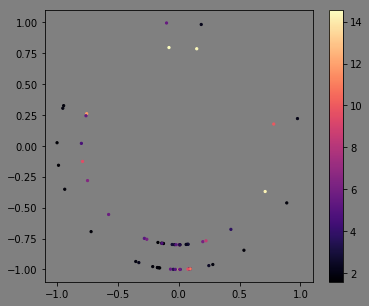

In [107]:
num = 0
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,100,gate=True)

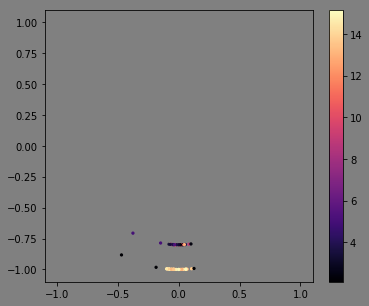

In [91]:
num = 5
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,100,gate=True)

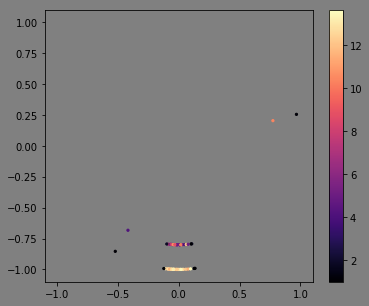

In [92]:
num = 5
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,200,gate=True)

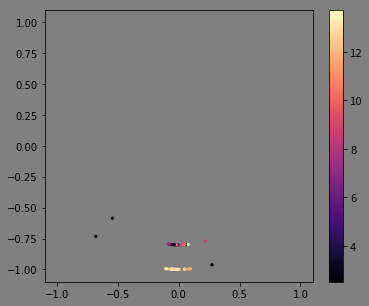

In [93]:
num = 5
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,300,gate=True)

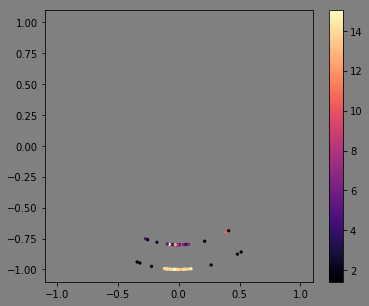

In [94]:
num = 5
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,400,gate=True)

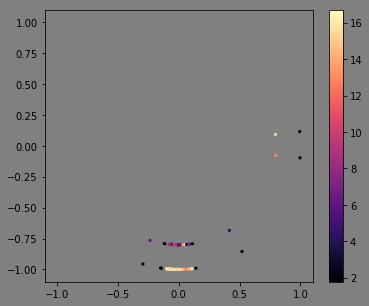

In [95]:
num = 5
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,500,gate=True)

In [90]:
num = 6
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,600,gate=True)

IndexError: list index out of range

In [ ]:
num = 7
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,700,gate=True)

In [ ]:
num = 8
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,800,gate=True)

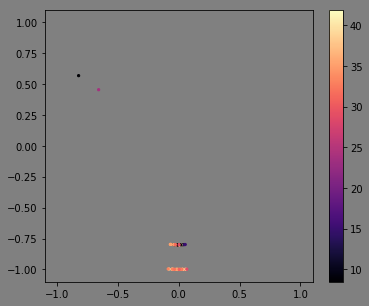

In [22]:
num = 19
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,900,gate=True)

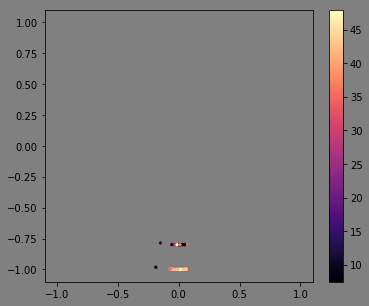

In [23]:
num = 10
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,len(data['target_losses'])-1,gate=True)